# Module

In [1]:
# preprocessing
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# warnings
import warnings 
warnings.filterwarnings(action='ignore')

# Load data

In [2]:
kbo = pd.read_csv('../dataset/crowd_df.csv')
statiz = pd.read_csv('../dataset/statiz_record.csv')
weather = pd.read_csv('../dataset/weather.csv', encoding='cp949')
print('kbo size: ',kbo.shape)
print('statiz size: ',statiz.shape)
print('weather size: ',weather.shape)

kbo size:  (2009, 6)
statiz size:  (2144, 5)
weather size:  (10549, 8)


## Game ID

In [3]:
kbo['game_id'] = np.arange(1,kbo.shape[0]+1)

In [4]:
kbo.head()

,날짜,요일,홈,방문,구장,관중수,game_id
0,2017/03/31,금,두산,한화,잠실,"21,121",1
1,2017/03/31,금,삼성,KIA,대구,"13,505",2
2,2017/03/31,금,SK,KT,문학,"13,649",3
3,2017/03/31,금,넥센,LG,고척,"8,013",4
4,2017/03/31,금,NC,롯데,마산,"11,000",5


# information

In [5]:
kbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 7 columns):
날짜         2009 non-null object
요일         2009 non-null object
홈          2009 non-null object
방문         2009 non-null object
구장         2009 non-null object
관중수        2009 non-null object
game_id    2009 non-null int32
dtypes: int32(1), object(6)
memory usage: 102.1+ KB


In [6]:
statiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 5 columns):
date          2144 non-null object
away          2144 non-null object
away_score    2144 non-null int64
home_score    2144 non-null int64
home          2144 non-null object
dtypes: int64(2), object(3)
memory usage: 83.8+ KB


In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10549 entries, 0 to 10548
Data columns (total 8 columns):
지점            10549 non-null int64
일시            10549 non-null object
평균기온(°C)      10548 non-null float64
최저기온(°C)      10548 non-null float64
최고기온(°C)      10546 non-null float64
일강수량(mm)      3770 non-null float64
평균 풍속(m/s)    10539 non-null float64
평균 상대습도(%)    10549 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 659.4+ KB


# Change Columns Name

In [8]:
kbo.columns = ['date','weeks','home','away','stadium','nb_crowd','game_id']
weather.columns = ['region','date','avg_temp','min_temp','max_temp','rainfall','avg_windspeed','avg_relative_humid']

In [9]:
print(kbo.columns)

Index(['date', 'weeks', 'home', 'away', 'stadium', 'nb_crowd', 'game_id'], dtype='object')


In [10]:
print(weather.columns)

Index(['region', 'date', 'avg_temp', 'min_temp', 'max_temp', 'rainfall',
       'avg_windspeed', 'avg_relative_humid'],
      dtype='object')


# Type Conversion

In [11]:
kbo.nb_crowd = kbo.nb_crowd.str.replace(',','').astype(int)

## date

In [12]:
kbo.date = pd.to_datetime(kbo.date)
statiz.date = pd.to_datetime(statiz.date)
weather.date = pd.to_datetime(weather.date)

## region

In [13]:
region_code = {108:'Seoul', 112:'Incheon', 119:'Suwon', 131:'Chungju', 133:'Daejeon',
              138:'Pohang', 143:'Daegu', 152:'Ulsan', 155:'Changwon', 156:'Gwangju', 159:'Busan'}
weather.region = weather.region.map(region_code)
weather.region.unique()

array(['Seoul', 'Incheon', 'Suwon', 'Chungju', 'Daejeon', 'Pohang',
       'Daegu', 'Ulsan', 'Changwon', 'Gwangju', 'Busan'], dtype=object)

## team name
넥센은 올해부터 이름이 키움으로 바꼈기 때문에 키움 이름을 넥센으로 변경한다

In [14]:
team_name = {'두산':'DOOSAN', '삼성':'SAMSUNG', '넥센':'NEXEN', '한화':'HANHWA', '롯데':'LOTTE',
            '키움':'NEXEN', 'SK':'SK', 'NC':'NC', 'KT':'KT', 'KIA':'KIA', 'LG':'LG'}

statiz['away'] = statiz.away.apply(lambda x: 'KT' if x == 'kt' else x)
statiz['home'] = statiz.home.apply(lambda x: 'KT' if x == 'kt' else x)

team_name['드림']  = 'DREAM'
team_name['서군'] = 'SEOGUN'
statiz['away'] = statiz.away.map(team_name)
statiz['home'] = statiz.home.map(team_name)
kbo['home'] = kbo.home.map(team_name)
kbo['away'] = kbo.away.map(team_name)

## stadium

In [15]:
kbo.stadium.unique()

array(['잠실', '대구', '문학', '고척', '마산', '대전', '수원', '광주', '사직', '울산', '포항',
       '청주', '창원'], dtype=object)

In [16]:
stadium = ['Jamsil', 'Daegu', 'Munhak', 'Gocheok','Masan','Daejeon','Suwon',
           'Gwangju','Sajik','Ulsan','Pohang','Chungju','Changwon']
stadium = dict(zip(kbo.stadium.unique(), stadium))
kbo['stadium'] = kbo.stadium.map(stadium)

## weeks

In [17]:
kbo.weeks = kbo.date.apply(lambda x: x.strftime('%A'))

## year, month, day

In [18]:
kbo['year'] = kbo.date.dt.year
kbo['month'] = kbo.date.dt.month
kbo['day'] = kbo.date.dt.day

# Missing Value

## weather rainfall

In [19]:
weather.loc[weather.avg_windspeed.isnull(), 'avg_windspeed'] = 0
weather.loc[weather.rainfall.isnull(), 'rainfall'] = 0

## weather avg_temp
- 평균기온의 결측값은 최저기온과 최대기온은 평균으로 대체한다

In [20]:
weather[weather.avg_temp.isnull()]

,region,date,avg_temp,min_temp,max_temp,rainfall,avg_windspeed,avg_relative_humid
5963,Daegu,2017-07-29,NaN,21.5,26.2,30.0,3.1,91.3


In [21]:
weather.loc[weather.avg_temp.isnull(), 'avg_temp'] = weather.loc[weather.avg_temp.isnull(), ['min_temp','max_temp']].mean(axis=1)

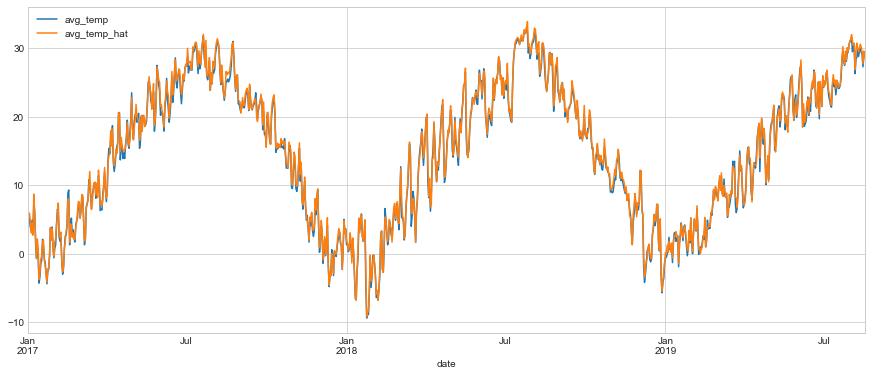

In [22]:
temp = weather.loc[weather.region == 'Daegu', ['date','avg_temp']].copy()
temp['avg_temp_hat'] = weather.loc[weather.region=='Daegu', ['min_temp', 'max_temp']].mean(axis=1)
temp = temp.set_index('date')
temp.plot(legend=True, figsize=(15,6))

## weather max_temp
- 최대기온의 결측값은 평균기온 + (평균기온 - 최저기온) 으로 한다.

In [23]:
weather[weather.max_temp.isnull()]

,region,date,avg_temp,min_temp,max_temp,rainfall,avg_windspeed,avg_relative_humid
284,Seoul,2017-10-12,11.4,8.8,NaN,0.0,2.0,71.0
2850,Suwon,2019-07-22,27.0,24.3,NaN,0.0,0.0,80.8
2851,Suwon,2019-07-23,28.3,NaN,NaN,0.0,0.0,76.9


In [24]:
null_avg_temp = weather.loc[weather.max_temp.isnull(), 'avg_temp']
null_min_temp = weather.loc[weather.max_temp.isnull(), 'min_temp']
weather.loc[weather.max_temp.isnull(), 'max_temp'] = null_avg_temp + (null_avg_temp - null_min_temp)

In [25]:
weather = weather.fillna(method='ffill')

# Table Join

In [28]:
kbo.head()

,date,weeks,home,away,stadium,nb_crowd,game_id,year,month,day
0,2017-03-31,Friday,DOOSAN,HANHWA,Jamsil,21121,1,2017,3,31
1,2017-03-31,Friday,SAMSUNG,KIA,Daegu,13505,2,2017,3,31
2,2017-03-31,Friday,SK,KT,Munhak,13649,3,2017,3,31
3,2017-03-31,Friday,NEXEN,LG,Gocheok,8013,4,2017,3,31
4,2017-03-31,Friday,NC,LOTTE,Masan,11000,5,2017,3,31


In [29]:
statiz.head()

,date,away,away_score,home_score,home
0,2017-03-31,LG,2,1,NEXEN
1,2017-03-31,KIA,7,2,SAMSUNG
2,2017-03-31,LOTTE,5,6,NC
3,2017-03-31,KT,3,2,SK
4,2017-03-31,HANHWA,0,3,DOOSAN


## statiz

In [30]:
kbo = pd.merge(kbo, statiz, on=['date','home','away'], how='left')

In [31]:
map_region = ['Seoul', 'Daegu','Incheon', 'Seoul','Busan',
              'Daejeon','Suwon','Gwangju','Busan','Ulsan',
              'Pohang','Chungju','Changwon']
kbo['region'] = kbo.stadium.map(dict(zip(kbo.stadium.unique(), map_region)))

## weather

### Time Lag

In [32]:
weather = weather.set_index('date')

In [33]:
lag = 1
lag_features = ['avg_temp', 'min_temp', 'max_temp', 'rainfall',
               'avg_windspeed', 'avg_relative_humid']
regions = weather.region.unique()
weather_lag = pd.DataFrame()

for region in regions:
    weather_by_region = weather[weather.region==region]
    weather_by_region.index = weather_by_region.index + timedelta(lag)
    weather_lag = pd.concat([weather_lag, weather_by_region], axis=0)

In [34]:
kbo_weather = pd.merge(kbo, weather.reset_index(), on=['date','region'], how='left').copy()
kbo_weather = kbo_weather.set_index('date')

# Features Engineering

## weekend_is

In [35]:
kbo_weather.weeks.unique()

array(['Friday', 'Saturday', 'Sunday', 'Tuesday', 'Thursday', 'Wednesday',
       'Monday'], dtype=object)

In [36]:
kbo_weather['weekend_is'] = kbo_weather.weeks.apply(lambda x: 1 if x in ['Sunday','Saturday'] else 0)

## Win Percentage

In [37]:
teams = kbo_weather.home.unique()
for team in teams:
    # team 별 데이터 추출
    team_home = kbo_weather[kbo_weather.home.isin([team])]
    team_away = kbo_weather[kbo_weather.away.isin([team])]
    # 해당팀이 home에 속한 경우 home_score가 away_score보다 높으면 1 아니면 0
    # 해당팀이 away에 속한 경우 home_score가 away_score보다 높으면 0 아니면 1
    team_home['win'] = team_home.apply(lambda x: 1 if x.home_score - x.away_score > 0 else 0, axis=1)
    team_away['win'] = team_away.apply(lambda x: 0 if x.home_score - x.away_score > 0 else 1, axis=1)
    # home과 away에 나눠진 team 이름을 team이라는 columns으로 합침
    team_home['team'] = team_home.home
    team_away['team'] = team_away.away
    
    team_df = pd.concat([team_home, team_away], axis=0).sort_values(by='date')
    
    years = team_df.year.unique()
    # 승률(win percentage) = 누적합(cumlate sum) / 누적수(comulate count)
    for y in years:
        cum_win = np.round(team_df.loc[team_df.year==y, 'win'].cumsum() / (team_df.loc[team_df.year==y].groupby('team').cumcount()+1), 3)
        cum_win.iloc[1:] = cum_win.iloc[:-1].values
        cum_win.iloc[0] = 0
        team_df.loc[team_df.year==y, 'win_percentage'] = cum_win
    # 해당팀이 home에 속하는 경우 win_percentage를 home_win으로 away에 속하는 경우 away_win으로 대체
    home_win_pct = team_df[team_df.home==team].win_percentage
    away_win_pct = team_df[team_df.away==team].win_percentage
    home_condition = kbo_weather.game_id.isin(team_df.game_id)&(kbo_weather.home==team)
    away_condition = kbo_weather.game_id.isin(team_df.game_id)&(kbo_weather.away==team)
    kbo_weather.loc[home_condition, 'home_win'] = home_win_pct
    kbo_weather.loc[away_condition, 'away_win'] = away_win_pct

# Feature Selection

In [38]:
features = ['game_id', 'weeks', 'region', 'stadium', 'home', 'home_win', 'away', 'away_win', 'weekend_is',
           'avg_temp', 'min_temp', 'max_temp', 'rainfall', 'avg_windspeed', 'avg_relative_humid', 'nb_crowd']
kbo_weather = kbo_weather[features]

In [39]:
kbo_weather.tail()

,game_id,weeks,region,stadium,home,home_win,away,away_win,weekend_is,avg_temp,min_temp,max_temp,rainfall,avg_windspeed,avg_relative_humid,nb_crowd
date,,,,,,,,,,,,,,,,
2019-08-18,2005,Sunday,Seoul,Gocheok,NEXEN,0.578,HANHWA,0.381,1,NaN,NaN,NaN,NaN,NaN,NaN,6148
2019-08-18,2006,Sunday,Gwangju,Gwangju,KIA,0.446,KT,0.491,1,NaN,NaN,NaN,NaN,NaN,NaN,10240
2019-08-18,2007,Sunday,Daegu,Daegu,SAMSUNG,0.427,LG,0.536,1,NaN,NaN,NaN,NaN,NaN,NaN,9889
2019-08-18,2008,Sunday,Seoul,Jamsil,DOOSAN,0.593,LOTTE,0.384,1,NaN,NaN,NaN,NaN,NaN,NaN,11437
2019-08-18,2009,Sunday,Changwon,Changwon,NC,0.509,SK,0.649,1,NaN,NaN,NaN,NaN,NaN,NaN,8594


# Final Data Summary

In [40]:
kbo_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2013 entries, 2017-03-31 to 2019-08-18
Data columns (total 16 columns):
game_id               2013 non-null int32
weeks                 2013 non-null object
region                2013 non-null object
stadium               2013 non-null object
home                  2013 non-null object
home_win              2013 non-null float64
away                  2013 non-null object
away_win              2013 non-null float64
weekend_is            2013 non-null int64
avg_temp              2008 non-null float64
min_temp              2008 non-null float64
max_temp              2008 non-null float64
rainfall              2008 non-null float64
avg_windspeed         2008 non-null float64
avg_relative_humid    2008 non-null float64
nb_crowd              2013 non-null int32
dtypes: float64(8), int32(2), int64(1), object(5)
memory usage: 291.6+ KB


In [41]:
kbo_weather.describe(include='all')

,game_id,weeks,region,stadium,home,home_win,away,away_win,weekend_is,avg_temp,min_temp,max_temp,rainfall,avg_windspeed,avg_relative_humid,nb_crowd
count,2013.000000,2013,2013,2013,2013,2013.000000,2013,2013.000000,2013.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2013.000000
unique,NaN,7,11,13,10,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Saturday,Seoul,Jamsil,NEXEN,NaN,KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,352,610,402,208,NaN,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1005.828614,NaN,NaN,NaN,NaN,0.496307,NaN,0.496896,0.340785,20.939392,16.672311,26.048556,2.545618,2.212450,65.335259,11153.718828
std,579.813398,NaN,NaN,NaN,NaN,0.131746,NaN,0.132919,0.474091,5.844667,6.388724,5.845811,10.716421,0.997173,15.179793,5635.492255
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,3.300000,-1.100000,7.400000,0.000000,0.400000,20.500000,1158.000000
25%,504.000000,NaN,NaN,NaN,NaN,0.424000,NaN,0.423000,0.000000,17.200000,12.000000,22.500000,0.000000,1.500000,54.400000,7012.000000
50%,1007.000000,NaN,NaN,NaN,NaN,0.496000,NaN,0.495000,0.000000,21.500000,17.300000,26.600000,0.000000,2.000000,65.900000,9805.000000
75%,1506.000000,NaN,NaN,NaN,NaN,0.570000,NaN,0.574000,1.000000,25.000000,21.400000,29.900000,0.100000,2.600000,76.400000,14364.000000


In [42]:
kbo_weather.to_csv('../dataset/train.csv')